<br><h1><center>Personalized Medicine : Redefining Cancer Treatment</center></h1></br>

<h2><center>AI powered Clinical Pathologist</center></h2>

**Team**

1. **Abdullah Muazzam** : msds17013

2. **Faisal Maqbool**  : msds17027

3. **Syed Shahbaz Hussain** : msds17016

# Required Libraries

In [1]:
import pandas as pd
import gensim
import logging
import os
import nltk.data
import string
%matplotlib inline
import spacy
nlp = spacy.load('xx')
import pandas as pd
from sklearn.externals import joblib
import numpy as np
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
import re
from nltk.corpus import stopwords

c:\programdata\anaconda3\envs\tensorflow-gpu\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from string import punctuation

from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Bidirectional, Embedding, Dropout, Activation, GRU
from keras.layers.merge import concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras import optimizers

c:\programdata\anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Reading Data

In [3]:
gene_var_df = pd.read_csv("training_variants")
test_variants = pd.read_csv("stage2_test_variants.csv")

In [4]:
gene_var_df.head()


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [5]:
train_text = pd.read_csv('training_text', sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text = pd.read_csv('stage2_test_text.csv', sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [6]:
train_text.head()
test_text.head()

,ID,Text
0,1,The incidence of breast cancer is increasing i...
1,2,An unselected series of 310 colorectal carcino...
2,3,Mycosis fungoides and SÃ©zary syndrome are pri...
3,4,Regulated progression through the cell cycle ...
4,5,Pilocytic astrocytoma (PA) is emerging as a tu...


# Data Preprocessing

In [7]:
from spacy.lang.en.stop_words import STOP_WORDS

for word in STOP_WORDS:
    lexeme = nlp.vocab[word]
    lexeme.is_stop = False
    
lmtzr = WordNetLemmatizer()

In [8]:
# custom stop words list
my_stop_words = ["about", "all" ,"among" ,"an","and","as","at","be","been","between","both","by","for","if","into"
,"it" ,"its" ,"on" ,"or","that","the","their","these","they","this","those","to","toward","upon","used","using","what","which","with","within",
                "Fig", "Figure", "table", "table", "et", "al."]

for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [15]:
#remove stop words, lemmatize and tokenize scientific texts
article = []
texts = []
lines = []
labels = []
#file = open('imran_khan_corpus.txt', 'wb')
research_pprs = train_text['Text'].values
for i in range(len(research_pprs)):
    research_ppr = nlp(reserach_pprs[i])
    for w in research_ppr:
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and not w.like_url and not len(w.orth_.strip()) <= 1:
        # we add the lematized version of the word
            article.append(w.lemma_.lower().strip())
    research_ppr = article
    to_be_written = ' '.join(article)
    lines.append(to_be_written)
    texts.append(research_ppr)
    labels.append(gene_var_df['Class'].values[i])
    article = []

In [9]:
if 1 == 0:
    joblib.dump(texts, 'cleaned_texts.pkl')
texts = joblib.load('cleaned_texts.pkl')

In [30]:
w = lmtzr.lemmatize('tn672')
w

'tn672'

In [10]:
texts = np.asarray(texts)

In [40]:
texts[0]

['cyclin',
 'dependent',
 'kinases',
 'cdks',
 'regulate',
 'variety',
 'of',
 'fundamental',
 'cellular',
 'processes',
 'cdk10',
 'stands',
 'out',
 'of',
 'last',
 'orphan',
 'cdks',
 'no',
 'activating',
 'cyclin',
 'has',
 'identified',
 'no',
 'kinase',
 'activity',
 'revealed',
 'previous',
 'work',
 'has',
 'shown',
 'cdk10',
 'silencing',
 'increases',
 'ets2',
 'ets',
 'erythroblastosis',
 'virus',
 'e26',
 'oncogene',
 'homolog',
 '2)-driven',
 'activation',
 'of',
 'mapk',
 'pathway',
 'confers',
 'tamoxifen',
 'resistance',
 'breast',
 'cancer',
 'cells',
 'the',
 'precise',
 'mechanisms',
 'cdk10',
 'modulates',
 'ets2',
 'activity',
 'more',
 'generally',
 'functions',
 'of',
 'cdk10',
 'remain',
 'elusive',
 'here',
 'we',
 'demonstrate',
 'cdk10',
 'is',
 'cyclin',
 'dependent',
 'kinase',
 'identifying',
 'cyclin',
 'activating',
 'cyclin',
 'cyclin',
 'orphan',
 'cyclin',
 'is',
 'product',
 'of',
 'fam58a',
 'whose',
 'mutations',
 'because',
 'star',
 'syndrome',
 

In [10]:
import re

text = ("Education shall be directed to the full development of the human personality "
        "and to the strengthening of respect for human rights and fundamental freedoms.").split()

def search(target, words, context=6):
    
    # It's easier to use re.findall to split the string, 
    # as we get rid of the punctuation
    #words = re.findall(r'\w+', text)
    #words = [x.strip(' ') for x in words]
    
    
    targets = target.split()
    
    matches = (i for (i,w) in enumerate(words) if stemmer.stem(w.lower()) == stemmer.stem(targets[0].lower()))
    for index in matches:
        if index < context //2:
            yield words[0:context+1]
        elif index > len(words) - context//2 - 1:
            yield words[-(context+1):]
        else:
            yield words[index - context//2:index + context//2 + 1]

print(list(search('the', text)))
# [['be', 'directed', 'to', 'the', 'full', 'development', 'of'], 
#  ['full', 'development', 'of', 'the', 'human', 'personality', 'and'], 
#  ['personality', 'and', 'to', 'the', 'strengthening', 'of', 'respect']]

print(list(search('shall', text)))
# [['Education', 'shall', 'be', 'directed', 'to', 'the', 'full']]

print(list(search('freedoms', text)))
# [['respect', 'for', 'human', 'rights', 'and', 'fundamental', 'freedoms']]


[['be', 'directed', 'to', 'the', 'full', 'development', 'of'], ['full', 'development', 'of', 'the', 'human', 'personality', 'and'], ['personality', 'and', 'to', 'the', 'strengthening', 'of', 'respect']]
[['Education', 'shall', 'be', 'directed', 'to', 'the', 'full']]
[]


In [11]:
# Extract out context surrounding gene variation in research articles
# and store in doc_context
doc_context = []
labels = []
ids_not = []
classes = gene_var_df['Class'].values
# list of list of words in the context of gene variation 
text_ctr = 0
for variation in gene_var_df['Variation'].values:
    #print(variation)
    #text = train_text['Text'].values[text_ctr]
    text = texts[text_ctr]
    class_label = classes[text_ctr]
    searched_list = list(search(variation, text, context = 30))
    if len(searched_list) == 0:
        ids_not.append(text_ctr)
    for context in searched_list:
        doc_context.append(context)
        labels.append(class_label)
    text_ctr += 1

In [19]:
w = nlp('W515K')

In [22]:
for w in w:
    print(w)

W515
K


In [13]:
import collections
counter = collections.Counter(doc for docs_set in doc_context for doc in set(docs_set))

In [14]:
stemmer.stem('truncated')

'truncat'

In [15]:
doc_context = np.asarray(doc_context)

In [16]:
#encoding labels
dlabels = []
for i in range(len(labels)):
    dlabels.append([str(labels[i]),'doc '+str(i)])

In [17]:
np.unique(np.asarray(labels), return_counts= True)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([ 7024,  8086,   286,  6733,   919,  1276, 16153,   402,   425], dtype=int64))

# Word Embeddings : doc2vec model

In [118]:
#generator for doc2vec model
class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
              yield gensim.models.doc2vec.LabeledSentence(doc,    
self.labels_list[idx])

In [122]:
# Initializing doc2vec model
from gensim import models
labelled_text = LabeledLineSentence(doc_context, dlabels)
model = gensim.models.Doc2Vec()
model = gensim.models.Doc2Vec(labelled_text,size= 100, min_count=2, alpha=0.025, min_alpha=0.025, window = 5,dbow_words = 1, hs = 1, dm = 0)

In [123]:
model.train(labelled_text, total_examples=model.corpus_count, epochs = 50)

59212846

In [19]:
if 1 == 0:
    model.save('models/doc2vec100.model')
model = gensim.models.doc2vec.Doc2Vec.load('models/doc2vec100.model')

In [139]:
model.most_similar_

[('cancers', 0.6056156754493713),
 ('adenocarcinoma', 0.5996608138084412),
 ('tumors', 0.5710145831108093),
 ('adenocarcinomas', 0.5660584568977356),
 ('kif5b', 0.5485581159591675),
 ('colon', 0.5396876335144043),
 ('alk', 0.539473295211792),
 ('cancer', 0.529688835144043),
 ('ldac', 0.513349711894989),
 ('ros1', 0.5089892148971558)]

In [21]:
import pandas as pd
df = pd.DataFrame(data = model.docvecs.doctag_syn0)
df['target'] = columns = model.docvecs.doctags.keys()
df = (df[~df['target'].isin(['1', '2','3','4','5','6','7','8','9'])])

In [22]:
df['target'] = np.asarray(labels)

# Visualizing in 2D through PCA

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = df.loc[:, df.columns != 'target'].values
Xtrain =sc.fit_transform(x_train)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
Xtrain = pca.fit_transform(Xtrain)
explained_variance = pca.explained_variance_ratio_

[   2.37000012    4.32999992    6.1500001     7.89000034    9.47000027
   10.93000031   12.32999992   13.68999958   15.00999928   16.30999947
   17.56999969   18.81999969   20.04999924   21.25         22.44000053
   23.61000061   24.77000046   25.92000008   27.04999924   28.1799984
   29.29999924   30.39999962   31.5          32.59000015   33.68000031
   34.76000214   35.84000397   36.91000366   37.97000504   39.02000427
   40.07000351   41.11000443   42.15000534   43.18000412   44.20000458
   45.22000504   46.23000336   47.24000168   48.24000168   49.24000168
   50.23000336   51.22000504   52.21000671   53.19000626   54.1700058
   55.15000534   56.12000656   57.09000778   58.05000687   59.01000595
   59.96000671   60.91000748   61.86000824   62.80000687   63.74000549
   64.68000793   65.62001038   66.55001068   67.48001099   68.41001129
   69.33000946   70.25000763   71.16001129   72.07001495   72.97001648
   73.87001801   74.7600174    75.65001678   76.54001617   77.42001343
   78.30

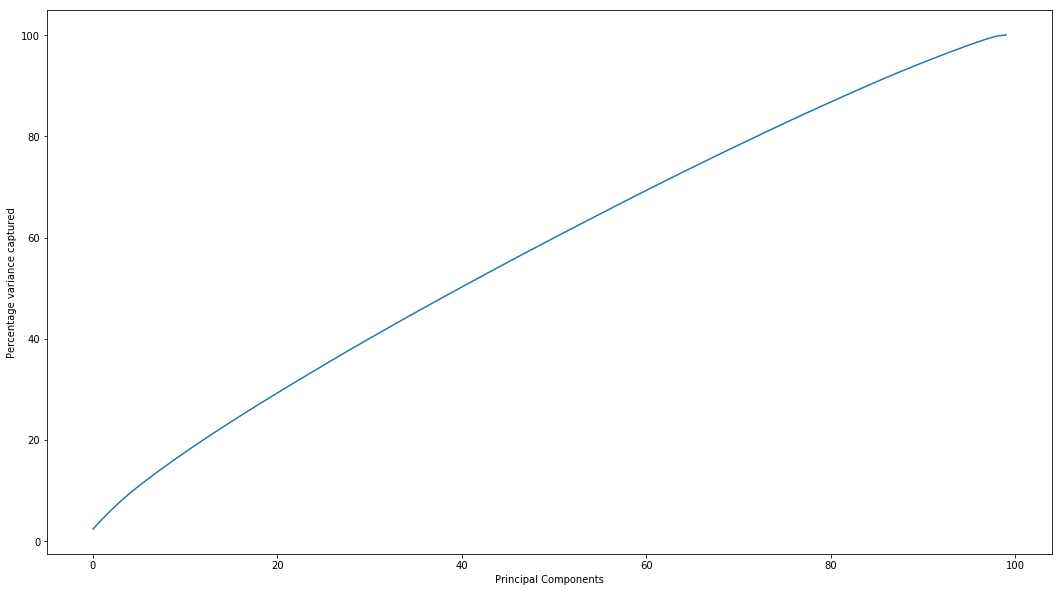

In [32]:
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,10))
plt.plot(var1)
plt.xlabel('Principal Components')
plt.ylabel('Percentage variance captured')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


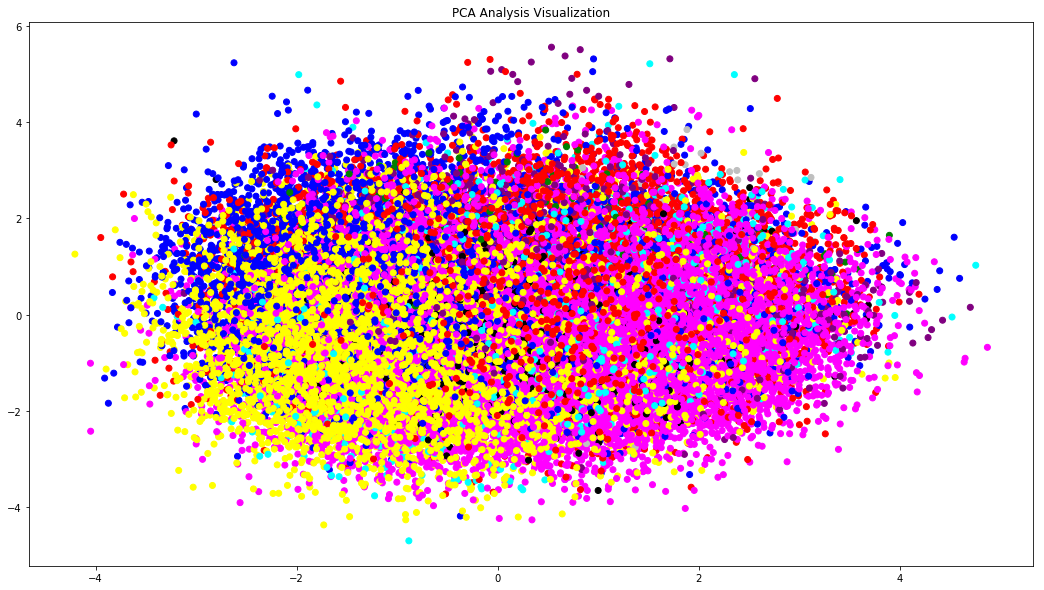

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from collections import defaultdict
from itertools import count
from functools import partial

color_dict = {1: 'blue', 2:'yellow', 3:'green', 4:'red',
       5:'purple', 6:'cyan', 7:'magenta', 8:'black', 9:'0.75'}

label_to_number = defaultdict(partial(next, count(1)))
l = [color_dict[label] for label in labels]

x = Xtrain[:,0]
y = Xtrain[:,1]

label = l
colors = ['red','green','blue','purple','yellow','cyan']



fig = plt.figure(figsize=(18,10))
plt.title('PCA Analysis Visualization')
plt.legend()
plt.scatter(x, y, c=l)

<IPython.core.display.Javascript object>


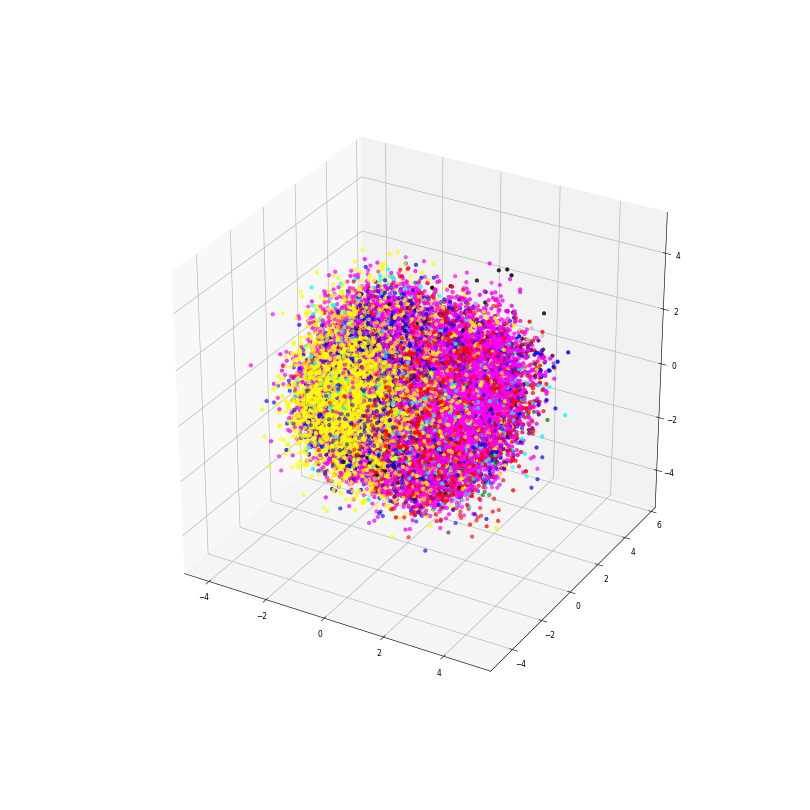

In [40]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D

z = Xtrain[:,2]

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=l)

# Experiments with PubMed word2vec models

In [7]:
def text_to_wordlist(text, remove_stopwords=True, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.
    
    # Convert words to lower case and split them
    text = str(text)
    text = text.split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"Figure", " ", text)
    text = re.sub(r"Abstract", " ", text)
    text = re.sub(r"abstract", " ", text)
    #text = re.sub(r"\W*(et)\W*", " ", text)
    #text = re.sub(r"\W*(al)\W*", " ", text)



    
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
        
    text = re.findall(r'\w+', text)
    text = [x.strip(' ') for x in text if ((x != 'et') & (x != 'al'))]
    
    # Return a list of words
    return(text)

In [8]:
# Function for preparing textual data
def prepare_text(text, gene_df, train_or_test):
    #if running for training texts set train_or_test = 1, else set to 0
    list_texts = []
    list_labels = []
    list_ids = []
    training_pprs = text['Text'].values
    if train_or_test == 1:
        training_labels = gene_df['Class'].values
    ids = gene_var_df['ID'].values
    for i in range(len(training_pprs)):
        list_texts.append(text_to_wordlist(training_pprs[i]))
        if train_or_test == 1:
            list_labels.append(training_labels[i])
        list_ids.append(ids[i])
    print ("Text Pre-processing Complete")
    if train_or_test == 1:
        return list_texts, list_labels, list_ids
    else:
        return list_texts, list_ids

In [9]:
training_texts, training_labels, training_ids = prepare_text(train_text, gene_var_df, train_or_test = 1)

Text Pre-processing Complete


In [10]:
testing_texts, testing_ids = prepare_text(test_text, test_variants, train_or_test = 0)

Text Pre-processing Complete


In [11]:
modelW2V = gensim.models.KeyedVectors.load_word2vec_format("models/wikipedia-pubmed-and-PMC-w2v.bin", binary = True)

In [12]:
#del modelW2V

In [13]:
# Check if genes variant exists in PubMed Word2Vec model
# returns list of ids for which variants exist + a dictionary holding variations
def check_var_word2vec(var_df, modelW2V):
    var_dict = {}
    list_ids = []
    ctr = 0
    for var in var_df['Variation'].values:
        var_tokens = re.findall(r'\w+', var)
        if (var_tokens[0] in modelW2V.vocab):
            list_ids.append(ctr)
            var_dict[var] = var_tokens[0]
        elif (var_tokens[0][:-1] in modelW2V.vocab):
            list_ids.append(ctr)
            var_dict[var] = var_tokens[0][:-1]
        elif (var_tokens[0][:-3] in modelW2V.vocab):
            list_ids.append(ctr)
            var_dict[var] = var_tokens[0][:-3]
        elif (var_tokens[0][:4] in modelW2V.vocab):
            list_ids.append(ctr)
            var_dict[var] = var_tokens[0][:4]
        elif (var_tokens[0][5:9] in modelW2V.vocab):
            list_ids.append(ctr)
            var_dict[var] = var_tokens[0][5:9]
        elif (var_tokens[0][:4].lower() in modelW2V.vocab):
            list_ids.append(ctr)
            var_dict[var] = var_tokens[0][:4].lower()
        elif (var_tokens[0].lower() in modelW2V.vocab):
            list_ids.append(ctr)
            var_dict[var] = var_tokens[0].lower()
        elif (var[0][:-1].lower() in modelW2V.vocab):
            list_ids.append(ctr)
            var_dict[var] = var_tokens[0][:-1].lower()
        else: pass
        ctr += 1
    print("Number of Variants found in W2V model: ", len(list_ids))
    return var_dict, list_ids

In [14]:
train_var_dict, train_var_ids = check_var_word2vec(gene_var_df, modelW2V)
test_var_dict, test_var_ids = check_var_word2vec(test_variants, modelW2V)

Number of Variants found in W2V model:  3294
Number of Variants found in W2V model:  983


In [12]:
def var_sentence_generator(var_df, var_dict, list_ids, topn, model):
    sentences = []
    var_arr = var_df['Variation'].values
    for ind in list_ids:
        var = var_arr[ind]
        var_tokens = re.findall(r'\w+', var)
        var_decoded = var_dict[var]
        most_similar = model.most_similar(var_decoded, topn = topn)
        word_list = [tuple[0] for tuple in most_similar]
        sentences.append(word_list)
    return sentences

In [15]:
def var_vector_generator(var_df, var_dict, list_ids, model):
    vecs = []
    var_arr = var_df['Variation'].values
    for ind in list_ids:
        var = var_arr[ind]
        var_tokens = re.findall(r'\w+', var)
        var_decoded = var_dict[var]
        word_vec = model.get_vector(var_decoded)
        vecs.append(word_vec)
    return vecs

In [23]:
train_var_vecs = var_vector_generator(gene_var_df, train_var_dict, train_var_ids, modelW2V)

In [24]:
test_var_vecs  = var_vector_generator(test_variants, test_var_dict, test_var_ids, modelW2V)

In [11]:
if 1 == 0:
    joblib.dump(train_var_vecs, 'train_var_vecs.pkl')
    joblib.dump(test_var_vecs, 'test_var_vecs.pkl')
train_var_vecs = joblib.load('train_var_vecs.pkl')
test_var_vecs = joblib.load('test_var_vecs.pkl')

In [ ]:
train_var_sentences = var_sentence_generator(gene_var_df, train_var_dict, train_var_ids, 30, modelW2V)

In [ ]:
test_var_sentences  = var_sentence_generator(test_variants, test_var_dict, test_var_ids, 30, modelW2V)

In [13]:
if 1 == 0:
    joblib.dump(train_var_sentences, 'train_var_augmented.pkl')
train_var_sentences = joblib.load('train_var_augmented.pkl')

In [14]:
if 1 == 0:
    joblib.dump(test_var_sentences, 'test_var_augmented.pkl')
test_var_sentences = joblib.load('test_var_augmented.pkl')

In [18]:
def gen_final_data(text, var_vec, var_ids, word_limit):
    text_begin = []
    text_end = []
    var_arr = np.zeros((len(text), 200))
    for t in text:
        text_begin.append(t[:word_limit])
        text_end.append(t[-word_limit:-1])
        
    for i in range(len(var_ids)):
        var_arr[var_ids[i],:] = var_vec[i]
        
    return text_begin, text_end, var_arr 

In [19]:
final_train_begin, final_train_end, final_train_vecs = gen_final_data(training_texts, train_var_vecs, train_var_ids, word_limit = 300)
final_test_begin, final_test_end, final_test_vecs = gen_final_data(testing_texts, test_var_vecs, test_var_ids, word_limit = 300)

In [14]:
def concat_text_and_var(text, var_sentence, var_ids, word_limit, from_end):
    merged_text = []
    for t in text:
        if from_end == 1:
            merged_text.append(t[:word_limit] + t[-word_limit:-1])
        else:
            merged_text.append(t[:word_limit])
    
    for i in range(len(var_ids)):
        merged_text[var_ids[i]] = merged_text[var_ids[i]] + var_sentence[i]
    return merged_text

In [ ]:
final_train = concat_text_and_var(training_texts, train_var_sentences, train_var_ids, word_limit = 300, from_end = 0)

In [ ]:
final_test = concat_text_and_var(testing_texts, test_var_sentences, test_var_ids, word_limit = 300, from_end = 0)

In [15]:
if 1 == 0:
    joblib.dump(final_train, 'final_train.pkl')
    joblib.dump(final_test, 'final_test.pkl')
final_train = joblib.load('final_train.pkl')
final_test = joblib.load('final_test.pkl')

In [11]:
if 1 == 0:
    joblib.dump(final_train_begin, 'final_train_begin.pkl')
    joblib.dump(final_train_end, 'final_train_end.pkl')
    joblib.dump(final_test_begin, 'final_test_begin.pkl')
    joblib.dump(final_test_end, 'final_test_end.pkl')
    joblib.dump(final_train_vecs, 'final_train_vecs.pkl')
    joblib.dump(final_test_vecs, 'final_test_vecs.pkl')
final_train_begin = joblib.load('final_train_begin.pkl')
final_train_end = joblib.load('final_train_end.pkl')
final_test_begin = joblib.load('final_test_begin.pkl')
final_test_end = joblib.load('final_test_end.pkl')
final_train_vecs = joblib.load('final_train_vecs.pkl')
final_test_vecs = joblib.load('final_test_vecs.pkl')

# Final Training and Testing Dataset created

In [12]:
# Merging final_train and final_test
import itertools
final_train_begin_joined = ' '.join(list(itertools.chain.from_iterable(final_train_begin)))
final_train_end_joined = ' '.join(list(itertools.chain.from_iterable(final_train_end)))

final_test_begin_joined = ' '.join(list(itertools.chain.from_iterable(final_test_begin)))
final_test_end_joined = ' '.join(list(itertools.chain.from_iterable(final_test_end)))


final_train_begin_joined1 = []
final_train_end_joined1 = []
for word_list in final_train_begin:
    final_train_begin_joined1.append(' '.join(word for word in word_list))
for word_list in final_train_end:
    final_train_end_joined1.append(' '.join(word for word in word_list))

final_test_begin_joined1 = []
final_test_end_joined1 = []
for word_list in final_test_begin:
    final_test_begin_joined1.append(' '.join(word for word in word_list))
for word_list in final_test_end:
    final_test_end_joined1.append(' '.join(word for word in word_list))


In [13]:
# Tokeinizing to get word indexes 
MAX_NB_WORDS = 200000
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower = False, filters = r"!")
tokenizer.fit_on_texts([final_train_begin_joined + final_train_end_joined
                        +final_test_begin_joined + final_test_end_joined])

In [14]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 48885 unique tokens


In [15]:
word_index

{'upregulated': 3931,
 '1171': 41346,
 'MI': 9833,
 'person': 11604,
 'var': 24789,
 'Pamela': 15966,
 'lymphoma24': 42470,
 'ones': 4374,
 'hCdc4': 12187,
 'erroneously': 11450,
 'MEN': 2067,
 'postcoitum': 37350,
 'assessed': 751,
 'L272F': 10255,
 'Prx': 24298,
 'robust': 1817,
 'Sainz': 27304,
 'Ly19': 48677,
 'pathogenically': 26257,
 'Cdk1': 16361,
 '010': 35272,
 'PTPN6': 16251,
 'mining': 20447,
 '0005': 8788,
 'encode': 1932,
 'immunoreactive': 11752,
 'Di': 7966,
 'forebrain': 15954,
 '602650': 46241,
 'investigations': 3193,
 'Pringle': 38580,
 'Schemper': 32123,
 'cytoplasmic': 907,
 'Viral': 14484,
 'T0': 48474,
 'circa': 36648,
 'Ccr9': 23411,
 'K1718': 34511,
 'ethnicity': 7001,
 '4563': 6644,
 'dtu': 40348,
 'HEP': 20613,
 'confined': 5717,
 'sis': 15611,
 'retro': 13109,
 'mycosis': 20161,
 'Campana': 29942,
 'Shattuck': 34087,
 'wheel': 16335,
 'G60': 23795,
 'coselected': 47332,
 'Declaration': 10398,
 'addressed': 3725,
 'L755S': 9157,
 'R515X': 39911,
 'CA72597': 3

In [16]:
train_begin_sequences = tokenizer.texts_to_sequences(final_train_begin_joined1)
train_end_sequences = tokenizer.texts_to_sequences(final_train_end_joined1)

test_begin_sequences = tokenizer.texts_to_sequences(final_test_begin_joined1)
test_end_sequences = tokenizer.texts_to_sequences(final_test_end_joined1)

print("Finished creating sequences")

Finished creating sequences


In [17]:
MAX_SEQUENCE_LENGTH = 300
train_data_begin = pad_sequences(train_begin_sequences, maxlen=MAX_SEQUENCE_LENGTH)
train_data_end = pad_sequences(train_end_sequences, maxlen=MAX_SEQUENCE_LENGTH)

test_data_begin = pad_sequences(test_begin_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data_end = pad_sequences(test_end_sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = gene_var_df['Class'].values
print('Shape of data tensor:', train_data_begin.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (3321, 300)
Shape of label tensor: (3321,)


In [18]:
EMBEDDING_DIM = 200
nb_words = min(MAX_NB_WORDS, len(word_index))+1

In [49]:
print('Preparing embedding matrix')
EMBEDDING_DIM = 200
nb_words = min(MAX_NB_WORDS, len(word_index))+1

embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in modelW2V.vocab:
        embedding_matrix[i] = modelW2V.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Preparing embedding matrix
Null word embeddings: 7474


In [19]:
if 1 == 0:
    joblib.dump(embedding_matrix, 'embeddings_exp2.pkl')
embedding_matrix = joblib.load('embeddings_exp2.pkl')

# Creating Training and Validation data

In [20]:
# 
VALIDATION_SPLIT = 0.2
perm = np.random.permutation(len(train_data_begin))
idx_train = perm[:int(len(train_data_begin)*(1-VALIDATION_SPLIT))]
idx_val = perm[int(len(train_data_begin)*(1-VALIDATION_SPLIT)):]
print("Trainng and Validation Split Complete")

Trainng and Validation Split Complete


In [21]:
x_train_begin = np.asarray(train_data_begin[idx_train])
x_train_end = np.asarray(train_data_end[idx_train])
x_train_vecs = final_train_vecs[idx_train]
y_train = np.asarray(labels[idx_train])

x_val_begin = np.asarray(train_data_begin[idx_val])
x_val_end = np.asarray(train_data_end[idx_val])
x_val_vecs = final_train_vecs[idx_val]
y_val = np.asarray(labels[idx_val])

In [22]:
x_test_begin = np.asarray(test_data_begin)
x_test_end = np.asarray(test_data_end)
x_test_vecs = final_test_vecs

In [23]:
# class weights
import collections
def get_class_weights(y):
    counter = collections.Counter(y)
    majority = max(counter.values())
    return  {cls: float(majority/count) for cls, count in counter.items()}
class_weights = get_class_weights(labels)
class_weights

{1: 1.6778169014084507,
 2: 2.1084070796460175,
 3: 10.707865168539326,
 4: 1.3892128279883382,
 5: 3.93801652892562,
 6: 3.4654545454545453,
 7: 1.0,
 8: 50.1578947368421,
 9: 25.756756756756758}

In [24]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
y_train_oh = np_utils.to_categorical(encoded_Y)
y_train_oh[0]

encoder = LabelEncoder()
encoder.fit(y_val)
encoded_Y = encoder.transform(y_val)
# convert integers to dummy variables (i.e. one hot encoded)
y_val_oh = np_utils.to_categorical(encoded_Y)
y_val_oh[0]



array([0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
sample_weights = np.zeros((len(y_train)))
for i in range(len(y_train)):
    sample_weights[i] = class_weights[y_train[i]]
sample_weights[0:10]

array([1.6778169 , 1.        , 1.6778169 , 1.6778169 , 1.        ,
       1.38921283, 1.6778169 , 3.46545455, 1.38921283, 1.6778169 ])

In [26]:
val_weights = np.zeros((len(y_val)))
for i in range(len(y_val)):
    val_weights[i] = class_weights[y_val[i]]
val_weights[0:10]

array([2.10840708, 1.6778169 , 1.        , 3.93801653, 2.10840708,
       1.6778169 , 2.10840708, 1.38921283, 1.        , 1.38921283])

In [27]:
x_train_begin.shape

(2656, 300)

# Simple LSTM Model

In [59]:
# Model structure
num_lstm = np.random.randint(196)
num_dense = 128#np.random.randint(100,120)
rate_drop_lstm = 0.15 + np.random.rand() * 0.25
rate_drop_dense = 0.15 + np.random.rand() * 0.25

act = 'selu'

embedding_layer = Embedding(nb_words,
        EMBEDDING_DIM,
        weights=[embedding_matrix],
        input_length=MAX_SEQUENCE_LENGTH,
        trainable=True)
lstm_layer = GRU(256, dropout=0.4, recurrent_dropout= 0.4)

sequence_1_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences_1 = embedding_layer(sequence_1_input)
x1 = lstm_layer(embedded_sequences_1)

merged = x1
merged = Dropout(rate_drop_dense)(merged)
#merged = BatchNormalization()(merged)

merged = Dense(num_dense, activation=act)(merged)
merged = Dropout(rate_drop_dense)(merged)
#merged = BatchNormalization()(merged)

preds = Dense(9, activation='softmax')(merged)

model = Model(inputs=[sequence_1_input], 
        outputs=preds)
model.compile(loss= [focal_loss(alpha=.25, gamma=2)],
        optimizer='adam',
        metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 330)               0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 330, 200)          14470400  
_________________________________________________________________
gru_2 (GRU)                  (None, 256)               350976    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 9)                 1161      
Total para

In [60]:
# declaring path to save model
STAMP = 'lstm_%d_%d_%.2f_%.2f'%(num_lstm, num_dense, rate_drop_lstm, \
        rate_drop_dense)
early_stopping =EarlyStopping(monitor='val_acc', patience=5)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

In [61]:
hist = model.fit([x_train], y_train_oh, \
        validation_data=([x_val], y_val_oh),\
        epochs=200, batch_size=256, shuffle=True, \
        callbacks=[early_stopping, model_checkpoint])

Train on 2656 samples, validate on 665 samples
Epoch 1/200
2656/2656 [==============================] - ETA: 23s - loss: 115.3884 - acc: 0.11 - ETA: 12s - loss: 113.1734 - acc: 0.16 - ETA: 8s - loss: 109.2961 - acc: 0.2070 - ETA: 6s - loss: 106.0665 - acc: 0.231 - ETA: 5s - loss: 104.6446 - acc: 0.238 - ETA: 3s - loss: 103.7256 - acc: 0.242 - ETA: 2s - loss: 101.7346 - acc: 0.248 - ETA: 1s - loss: 100.8064 - acc: 0.252 - ETA: 1s - loss: 99.6527 - acc: 0.259 - ETA: 0s - loss: 98.7343 - acc: 0.26 - 10s 4ms/step - loss: 96.4065 - acc: 0.2609 - val_loss: 80.6242 - val_acc: 0.3293
Epoch 2/200
2656/2656 [==============================] - ETA: 6s - loss: 90.1699 - acc: 0.30 - ETA: 5s - loss: 89.3087 - acc: 0.32 - ETA: 4s - loss: 91.4009 - acc: 0.31 - ETA: 3s - loss: 90.2827 - acc: 0.30 - ETA: 3s - loss: 89.2037 - acc: 0.30 - ETA: 2s - loss: 88.1767 - acc: 0.31 - ETA: 1s - loss: 88.2044 - acc: 0.31 - ETA: 1s - loss: 87.7882 - acc: 0.32 - ETA: 0s - loss: 87.5421 - acc: 0.32 - ETA: 0s - loss: 87

In [63]:
model.load_weights(bst_model_path)
bst_val_score = max(hist.history['val_acc'])
print(bst_val_score)

0.6195488772894207


In [64]:
preds = model.predict([x_test], verbose=1)

986/986 [==============================] - ETA: 33 - ETA: 18 - ETA: 13 - ETA: 11 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 6s 6ms/step


In [91]:
preds.shape

(986, 9)

In [65]:
import csv

def WriteCSV(a):
    f = np.arange(1,len(a)+1)
    to_write = np.zeros((986,10))
    to_write[:,0] = f
    to_write[:,1:] = a
    header = [['ID','class1','class2','class3','class4','class5','class6','class7','class8','class9']]
    with open("submission.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(header)
        writer.writerows(to_write)
        return


In [64]:
print("Making Prediction CSV File")
WriteCSV(preds)

Making Prediction CSV File


In [37]:
df = pd.read_csv("sample_submission.csv")

In [67]:
for i in range(1,10):
    df["class"+str(int(i))] = preds[:,i-1]
df.to_csv('submission13.csv', index = False)

In [68]:
df.to_csv('submission13.csv', index = False)

# Bi directional LSTM

In [28]:
#focal loss to deal with class imbalance issue
import tensorflow as tf
def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed

In [33]:
# Model structure
num_lstm = 256 #np.random.randint(196)
num_dense = 128 #np.random.randint(100,120)
rate_drop_lstm =0.4 #0.15 + np.random.rand() * 0.25
rate_drop_dense = 0.4 #0.15 + np.random.rand() * 0.25

act = 'relu'

embedding_layer = Embedding(nb_words,
        EMBEDDING_DIM,
        weights=[embedding_matrix],
        input_length=MAX_SEQUENCE_LENGTH,
        trainable=True)
lstm_layer = Bidirectional(GRU(num_lstm, dropout=rate_drop_lstm, recurrent_dropout= 0.4))

sequence_1_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences_1 = embedding_layer(sequence_1_input)
x1 = lstm_layer(embedded_sequences_1)

merged = x1
#merged = Dropout(rate_drop_dense)(merged)
#merged = BatchNormalization()(merged)

merged = Dense(num_dense, activation=act)(merged)
merged = Dropout(rate_drop_dense)(merged)
#merged = BatchNormalization()(merged)
#merged = Dense(30, activation = act)(merged)
#merged = Dropout(rate_drop_dense)(merged)
#merged = BatchNormalization()(merged)



preds = Dense(9, activation='softmax')(merged)

model = Model(inputs=[sequence_1_input], 
        outputs=preds)
model.compile(loss= [focal_loss(alpha=.25, gamma=2)],
        optimizer='adam',
        metrics=['acc'])
model.summary()
#[focal_loss(alpha=.25, gamma=2)]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 330)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 330, 200)          14470400  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               701952    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 1161      
Total params: 15,239,177
Trainable params: 15,239,177
Non-trainable params: 0
________________________________________________________________

In [34]:
# declaring path to save model
STAMP = 'GRU%d_%d_%.2f_%.2f'%(num_lstm, num_dense, rate_drop_lstm, \
        rate_drop_dense)
early_stopping =EarlyStopping(monitor='val_loss', patience=5)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=False)

In [35]:
hist = model.fit([x_train], y_train_oh, \
        validation_data=([x_val], y_val_oh),\
        epochs=200, batch_size=256, shuffle=True, \
        callbacks=[early_stopping, model_checkpoint])

Train on 2656 samples, validate on 665 samples
Epoch 1/200
2656/2656 [==============================] - ETA: 17s - loss: 114.2676 - acc: 0.11 - ETA: 11s - loss: 111.3937 - acc: 0.14 - ETA: 9s - loss: 109.1828 - acc: 0.1576 - ETA: 7s - loss: 106.7187 - acc: 0.182 - ETA: 6s - loss: 104.8064 - acc: 0.202 - ETA: 5s - loss: 102.4179 - acc: 0.216 - ETA: 3s - loss: 100.0910 - acc: 0.233 - ETA: 2s - loss: 98.7175 - acc: 0.247 - ETA: 1s - loss: 98.0510 - acc: 0.25 - ETA: 0s - loss: 97.9036 - acc: 0.25 - 14s 5ms/step - loss: 95.5300 - acc: 0.2620 - val_loss: 73.4551 - val_acc: 0.4571
Epoch 2/200
2656/2656 [==============================] - ETA: 8s - loss: 90.7819 - acc: 0.34 - ETA: 7s - loss: 85.1597 - acc: 0.34 - ETA: 6s - loss: 85.6462 - acc: 0.35 - ETA: 5s - loss: 84.4437 - acc: 0.35 - ETA: 4s - loss: 83.0471 - acc: 0.37 - ETA: 3s - loss: 82.7492 - acc: 0.38 - ETA: 3s - loss: 82.4955 - acc: 0.38 - ETA: 2s - loss: 81.7516 - acc: 0.39 - ETA: 1s - loss: 80.7917 - acc: 0.40 - ETA: 0s - loss: 80.3

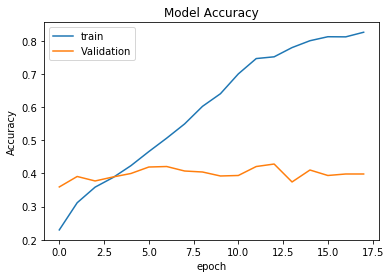

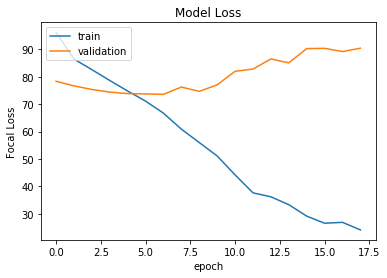

In [58]:
# Visualizing Loss and Accuracy
import matplotlib.pyplot as plt 
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Focal Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

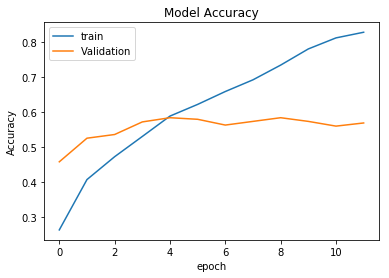

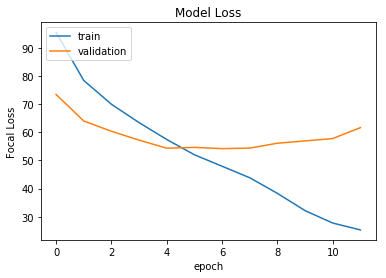

In [37]:
# Visualizing Loss and Accuracy
import matplotlib.pyplot as plt 
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Focal Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Bi Directional with Attention

In [29]:
# Attention Class for Keras

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [31]:
# Bi-LSTM/GRU with Attention Model Structure
num_lstm = 196 #np.random.randint(196)
num_dense = 128 #np.random.randint(100,120)
rate_drop_lstm =0.4 #0.15 + np.random.rand() * 0.25
rate_drop_dense = 0.4 #0.15 + np.random.rand() * 0.25

act = 'relu'
def relu_advanced(x):
    return K.relu(x, max_value=None)

embedding_layer = Embedding(nb_words,
        EMBEDDING_DIM,
        weights=[embedding_matrix],
        input_length=MAX_SEQUENCE_LENGTH,
        trainable=True)


lstm_layer_begin = Bidirectional(GRU(num_lstm, dropout=rate_drop_lstm, recurrent_dropout= 0.4, return_sequences= True))

# beginning sequence
sequence_1_input_begin = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences_1_begin = embedding_layer(sequence_1_input_begin)
x1 = lstm_layer_begin(embedded_sequences_1_begin)

merged_begin = x1
merged_begin = Attention(MAX_SEQUENCE_LENGTH)(merged_begin)
#merged = BatchNormalization()(merged)

# ending sequence
lstm_layer_end = Bidirectional(GRU(num_lstm, dropout=rate_drop_lstm, recurrent_dropout= 0.4, return_sequences= True))

sequence_1_input_end = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences_1_end = embedding_layer(sequence_1_input_end)
x2 = lstm_layer_end(embedded_sequences_1_end)

merged_end = x2
merged_end = Attention(MAX_SEQUENCE_LENGTH)(merged_end)
#merged = BatchNormalization()(merged)


var_input = Input(shape=(200,))
dense_1 = Dense(128, activation='relu')(var_input)

merged2 = concatenate([merged_begin, merged_end, dense_1])

merged2 = Dropout(rate_drop_dense)(merged2)
merged2 = Dense(num_dense, activation=act)(merged2)
merged2 = Dropout(rate_drop_dense)(merged2)



preds = Dense(9, activation='softmax')(merged2)

model = Model(inputs=[sequence_1_input_begin, sequence_1_input_end, var_input], 
        outputs=preds)
model.compile(loss= [focal_loss(alpha=.25, gamma=2.5)],
        optimizer='adam',
        metrics=['acc'])
model.summary()
#[focal_loss(alpha=.25, gamma=2)]

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 300, 200)     9777200     input_4[0][0]                    
                                                                 input_5[0][0]                    
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 300, 392)     466872      embedding_2[0][0]                
__________

In [32]:
# declaring path to save model
STAMP = 'Bi-GRU-w-Att%d_%d_%.2f_%.2f'%(num_lstm, num_dense, rate_drop_lstm, \
        rate_drop_dense)
early_stopping =EarlyStopping(monitor='val_loss', patience=5)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=False)

In [33]:
hist = model.fit([x_train_begin, x_train_end, x_train_vecs], y_train_oh, \
        validation_data=([x_val_begin, x_val_end, x_val_vecs], y_val_oh),\
        epochs=15, batch_size=256, shuffle=True)

Train on 2656 samples, validate on 665 samples
Epoch 1/15
2656/2656 [==============================] - ETA: 1:12 - loss: 105.8761 - acc: 0.113 - ETA: 42s - loss: 101.8270 - acc: 0.179 - ETA: 30s - loss: 98.0595 - acc: 0.2135 - ETA: 22s - loss: 95.4935 - acc: 0.237 - ETA: 17s - loss: 93.5787 - acc: 0.250 - ETA: 13s - loss: 91.0093 - acc: 0.261 - ETA: 9s - loss: 89.4642 - acc: 0.265 - ETA: 6s - loss: 88.1967 - acc: 0.27 - ETA: 3s - loss: 87.9290 - acc: 0.26 - ETA: 0s - loss: 86.6599 - acc: 0.26 - 29s 11ms/step - loss: 84.5958 - acc: 0.2651 - val_loss: 67.4971 - val_acc: 0.4316
Epoch 2/15
2656/2656 [==============================] - ETA: 21s - loss: 78.3403 - acc: 0.304 - ETA: 19s - loss: 76.5957 - acc: 0.353 - ETA: 16s - loss: 76.7226 - acc: 0.343 - ETA: 14s - loss: 76.0858 - acc: 0.354 - ETA: 12s - loss: 74.6437 - acc: 0.370 - ETA: 9s - loss: 74.2939 - acc: 0.380 - ETA: 7s - loss: 73.0119 - acc: 0.38 - ETA: 5s - loss: 72.8395 - acc: 0.39 - ETA: 2s - loss: 71.6859 - acc: 0.40 - ETA: 0s -

In [34]:
joblib.dump(hist.history, 'model_4.pkl')

['model_4.pkl']

In [ ]:
model.load_weights()

In [84]:
model.compile(loss= [focal_loss(alpha=.25, gamma=2)],
        optimizer=nadam,
        metrics=['acc'])

In [77]:
rmsprop = optimizers.RMSprop(lr=0.00001, rho=0.9, epsilon=None, decay=0.0)

In [83]:
nadam = optimizers.Nadam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

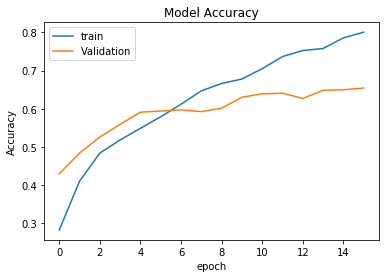

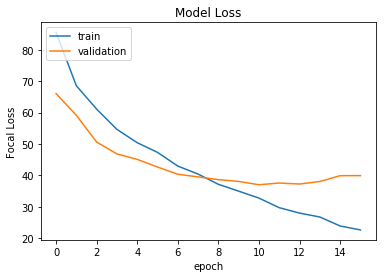

In [62]:
# Visualizing Loss and Accuracy
import matplotlib.pyplot as plt 
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Focal Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [63]:
model.save('model_4.h5')

In [68]:
model.load_weights(bst_model_path)
bst_val_score = max(hist.history['val_acc'])
print(bst_val_score)

0.6601503799732467


In [69]:
preds = model.predict([x_test_begin, x_test_end, x_test_vecs], verbose=1)

986/986 [==============================] - ETA: 57 - ETA: 31 - ETA: 23 - ETA: 18 - ETA: 15 - ETA: 13 - ETA: 12 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 10s 10ms/step


In [70]:
for i in range(1,10):
    df["class"+str(int(i))] = preds[:,i-1]
df.to_csv('submission18.csv', index = False)